# <u> Assignment 2:  Linear Regression on House Price Dataset<u>

####  NOTE:  I have done 2 Models. One with 14 features and the other with ALL features. The reason why i have done this is becuase i was getting a perfect score ( R2=1) using all 15 features. I wanted to do the assignment as intended and finetune, so i have examples of that with the 14 feature model.

#### Loading Modules 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV


#### Importing Dataset

In [2]:
file = pd.read_csv('HousePrices.csv')

## <u> Exploratory Data Analysis (EDA) <u>

In [3]:
file.shape

(500000, 16)

In [4]:
file.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Area           500000 non-null  int64
 1   Garage         500000 non-null  int64
 2   FirePlace      500000 non-null  int64
 3   Baths          500000 non-null  int64
 4   White Marble   500000 non-null  int64
 5   Black Marble   500000 non-null  int64
 6   Indian Marble  500000 non-null  int64
 7   Floors         500000 non-null  int64
 8   City           500000 non-null  int64
 9   Solar          500000 non-null  int64
 10  Electric       500000 non-null  int64
 11  Fiber          500000 non-null  int64
 12  Glass Doors    500000 non-null  int64
 13  Swiming Pool   500000 non-null  int64
 14  Garden         500000 non-null  int64
 15  Prices         500000 non-null  int64
dtypes: int64(16)
memory usage: 61.0 MB


In [6]:
file.describe(include='all')

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000
mean,124.929554,2.001290,2.003398,2.998074,0.332992,0.332690,0.334318,0.499386,2.000940,0.498694,0.50065,0.500468,0.49987,0.500436,0.501646,42050.139350
std,71.795363,0.817005,1.414021,1.414227,0.471284,0.471177,0.471752,0.500000,0.816209,0.499999,0.50000,0.500000,0.50000,0.500000,0.499998,12110.237201
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,7725.000000
25%,63.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,33500.000000
50%,125.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.00000,1.000000,0.00000,1.000000,1.000000,41850.000000
75%,187.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,50750.000000
max,249.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,77975.000000


In [7]:
file.isnull().sum()

Area             0
Garage           0
FirePlace        0
Baths            0
White Marble     0
Black Marble     0
Indian Marble    0
Floors           0
City             0
Solar            0
Electric         0
Fiber            0
Glass Doors      0
Swiming Pool     0
Garden           0
Prices           0
dtype: int64

### <u> Graphical EDA <u> 

C:\Users\61425\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


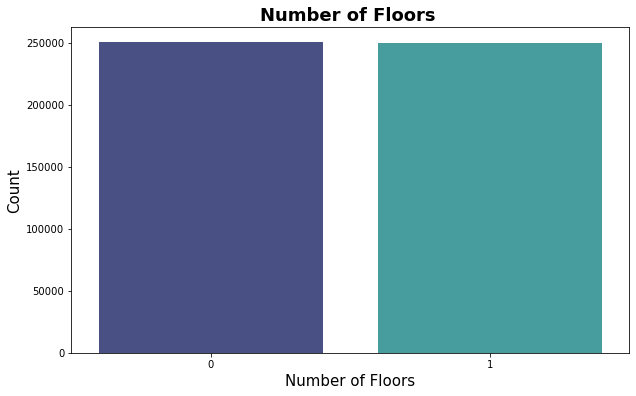

In [8]:
# Diffrence in Floor number 
plt.figure(figsize=(10,6))
sns.countplot(file["Floors"], palette="mako")
plt.title("Number of Floors ",  fontsize = 18, fontweight='bold')
plt.ylabel("Count", fontsize = 15)
plt.xlabel("Number of Floors", fontsize = 15)
plt.show()

In [9]:
# The Number of floors look evently spread

array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Garage'}>,
        <AxesSubplot:title={'center':'FirePlace'}>,
        <AxesSubplot:title={'center':'Baths'}>],
       [<AxesSubplot:title={'center':'White Marble'}>,
        <AxesSubplot:title={'center':'Black Marble'}>,
        <AxesSubplot:title={'center':'Indian Marble'}>,
        <AxesSubplot:title={'center':'Floors'}>],
       [<AxesSubplot:title={'center':'City'}>,
        <AxesSubplot:title={'center':'Solar'}>,
        <AxesSubplot:title={'center':'Electric'}>,
        <AxesSubplot:title={'center':'Fiber'}>],
       [<AxesSubplot:title={'center':'Glass Doors'}>,
        <AxesSubplot:title={'center':'Swiming Pool'}>,
        <AxesSubplot:title={'center':'Garden'}>,
        <AxesSubplot:title={'center':'Prices'}>]], dtype=object)

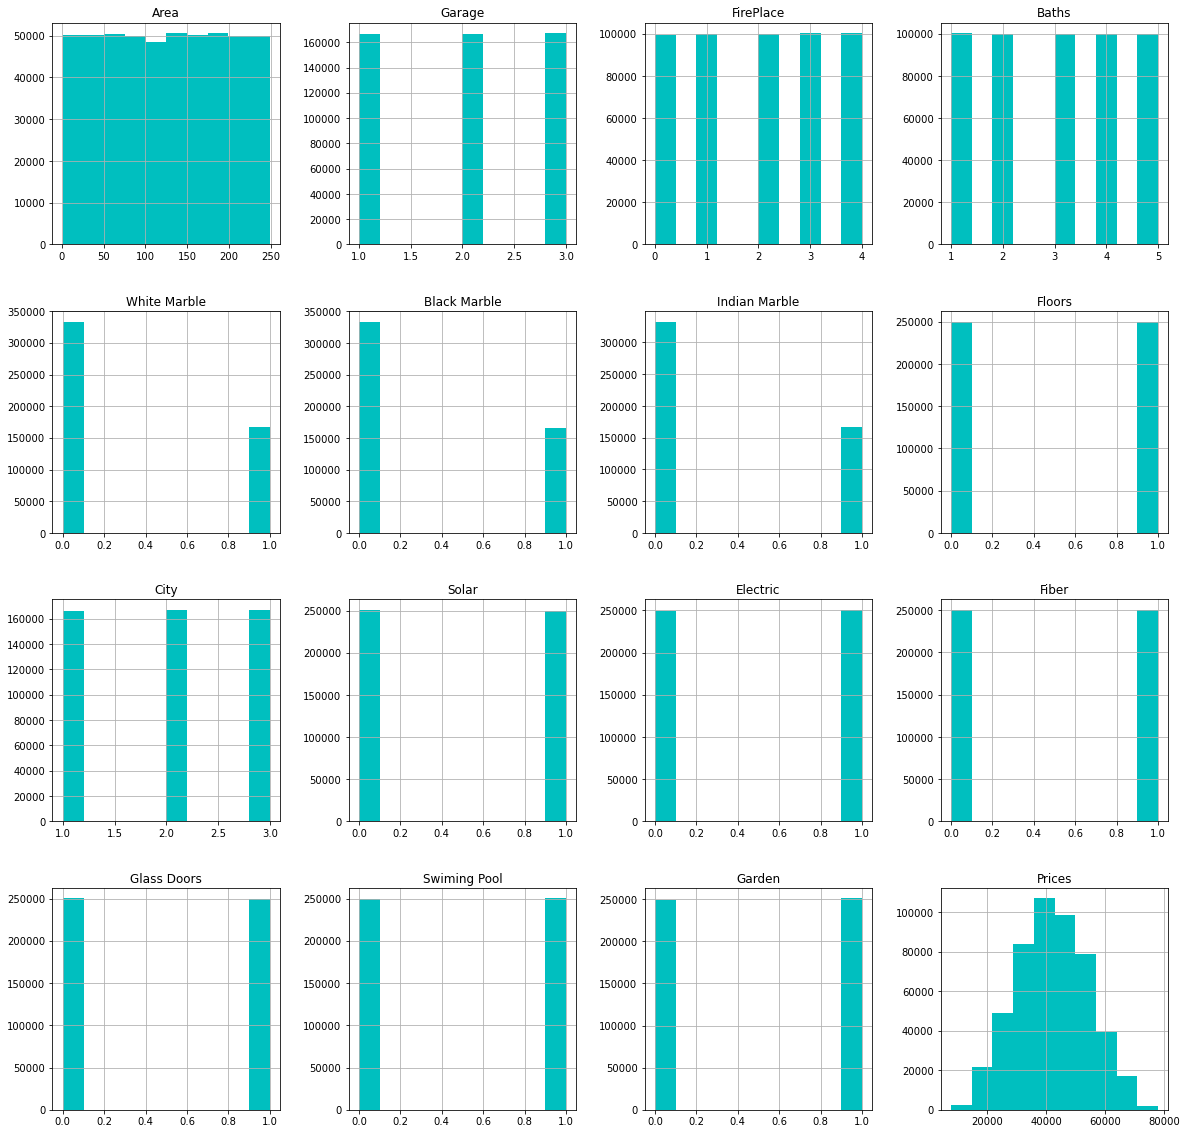

In [10]:
file.hist(figsize=(20,20), color = 'c')

#### Correlation

In [11]:
file.corr()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
Area,1.000000,-0.000897,0.000374,-0.000398,0.002525,-0.001477,-0.001047,-0.000776,-0.003455,0.000526,-0.000128,0.000114,-0.001230,0.000610,0.001428,0.147717
Garage,-0.000897,1.000000,0.001307,-0.003647,0.000541,0.001847,-0.002385,-0.000931,0.000793,0.001480,0.000779,-0.000562,-0.002171,0.001088,-0.000669,0.100294
FirePlace,0.000374,0.001307,1.000000,0.000643,0.000952,-0.000922,-0.000030,0.000185,-0.000211,-0.000309,0.001342,0.001818,-0.000366,0.001295,0.000231,0.089139
Baths,-0.000398,-0.003647,0.000643,1.000000,0.002493,-0.002739,0.000246,-0.000880,-0.000858,-0.000755,0.001047,-0.000687,-0.001668,0.002212,0.001723,0.145087
White Marble,0.002525,0.000541,0.000952,0.002493,1.000000,-0.498893,-0.500723,0.000078,-0.000861,-0.001583,0.000558,-0.000576,-0.000402,-0.001898,0.000959,0.448154
Black Marble,-0.001477,0.001847,-0.000922,-0.002739,-0.498893,1.000000,-0.500383,-0.000368,-0.000324,0.001764,-0.000549,0.000073,0.000086,0.000713,0.000133,-0.078049
Indian Marble,-0.001047,-0.002385,-0.000030,0.000246,-0.500723,-0.500383,1.000000,0.000289,0.001184,-0.000180,-0.000010,0.000503,0.000316,0.001184,-0.001091,-0.369756
Floors,-0.000776,-0.000931,0.000185,-0.000880,0.000078,-0.000368,0.000289,1.000000,-0.000641,-0.002651,0.000082,0.001373,-0.000008,-0.000211,-0.000492,0.619451
City,-0.003455,0.000793,-0.000211,-0.000858,-0.000861,-0.000324,0.001184,-0.000641,1.000000,0.000488,0.000788,-0.002716,0.000770,0.000322,0.001207,0.233259
Solar,0.000526,0.001480,-0.000309,-0.000755,-0.001583,0.001764,-0.000180,-0.002651,0.000488,1.000000,0.001883,0.000238,-0.000817,-0.000466,-0.004263,0.008429


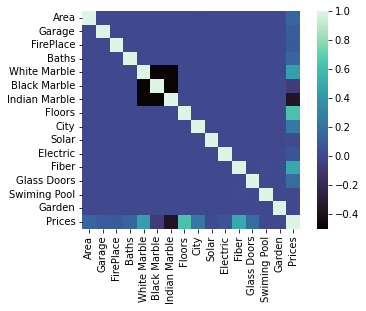

In [12]:
import seaborn as sns
ax = sns.heatmap(file.corr(),square=True, cmap="mako")

In [13]:
file.corr()["Prices"].sort_values()

Indian Marble   -0.369756
Black Marble    -0.078049
Garden           0.001540
Swiming Pool     0.001787
Solar            0.008429
Electric         0.052443
FirePlace        0.089139
Garage           0.100294
Baths            0.145087
Area             0.147717
Glass Doors      0.181973
City             0.233259
White Marble     0.448154
Fiber            0.484626
Floors           0.619451
Prices           1.000000
Name: Prices, dtype: float64

In [14]:
# No features have a strong correlation to price. The highest being "Floors" followed by "Fiber". With the least correlated values being "Black Marble" and "Garden"

#### Pairplot

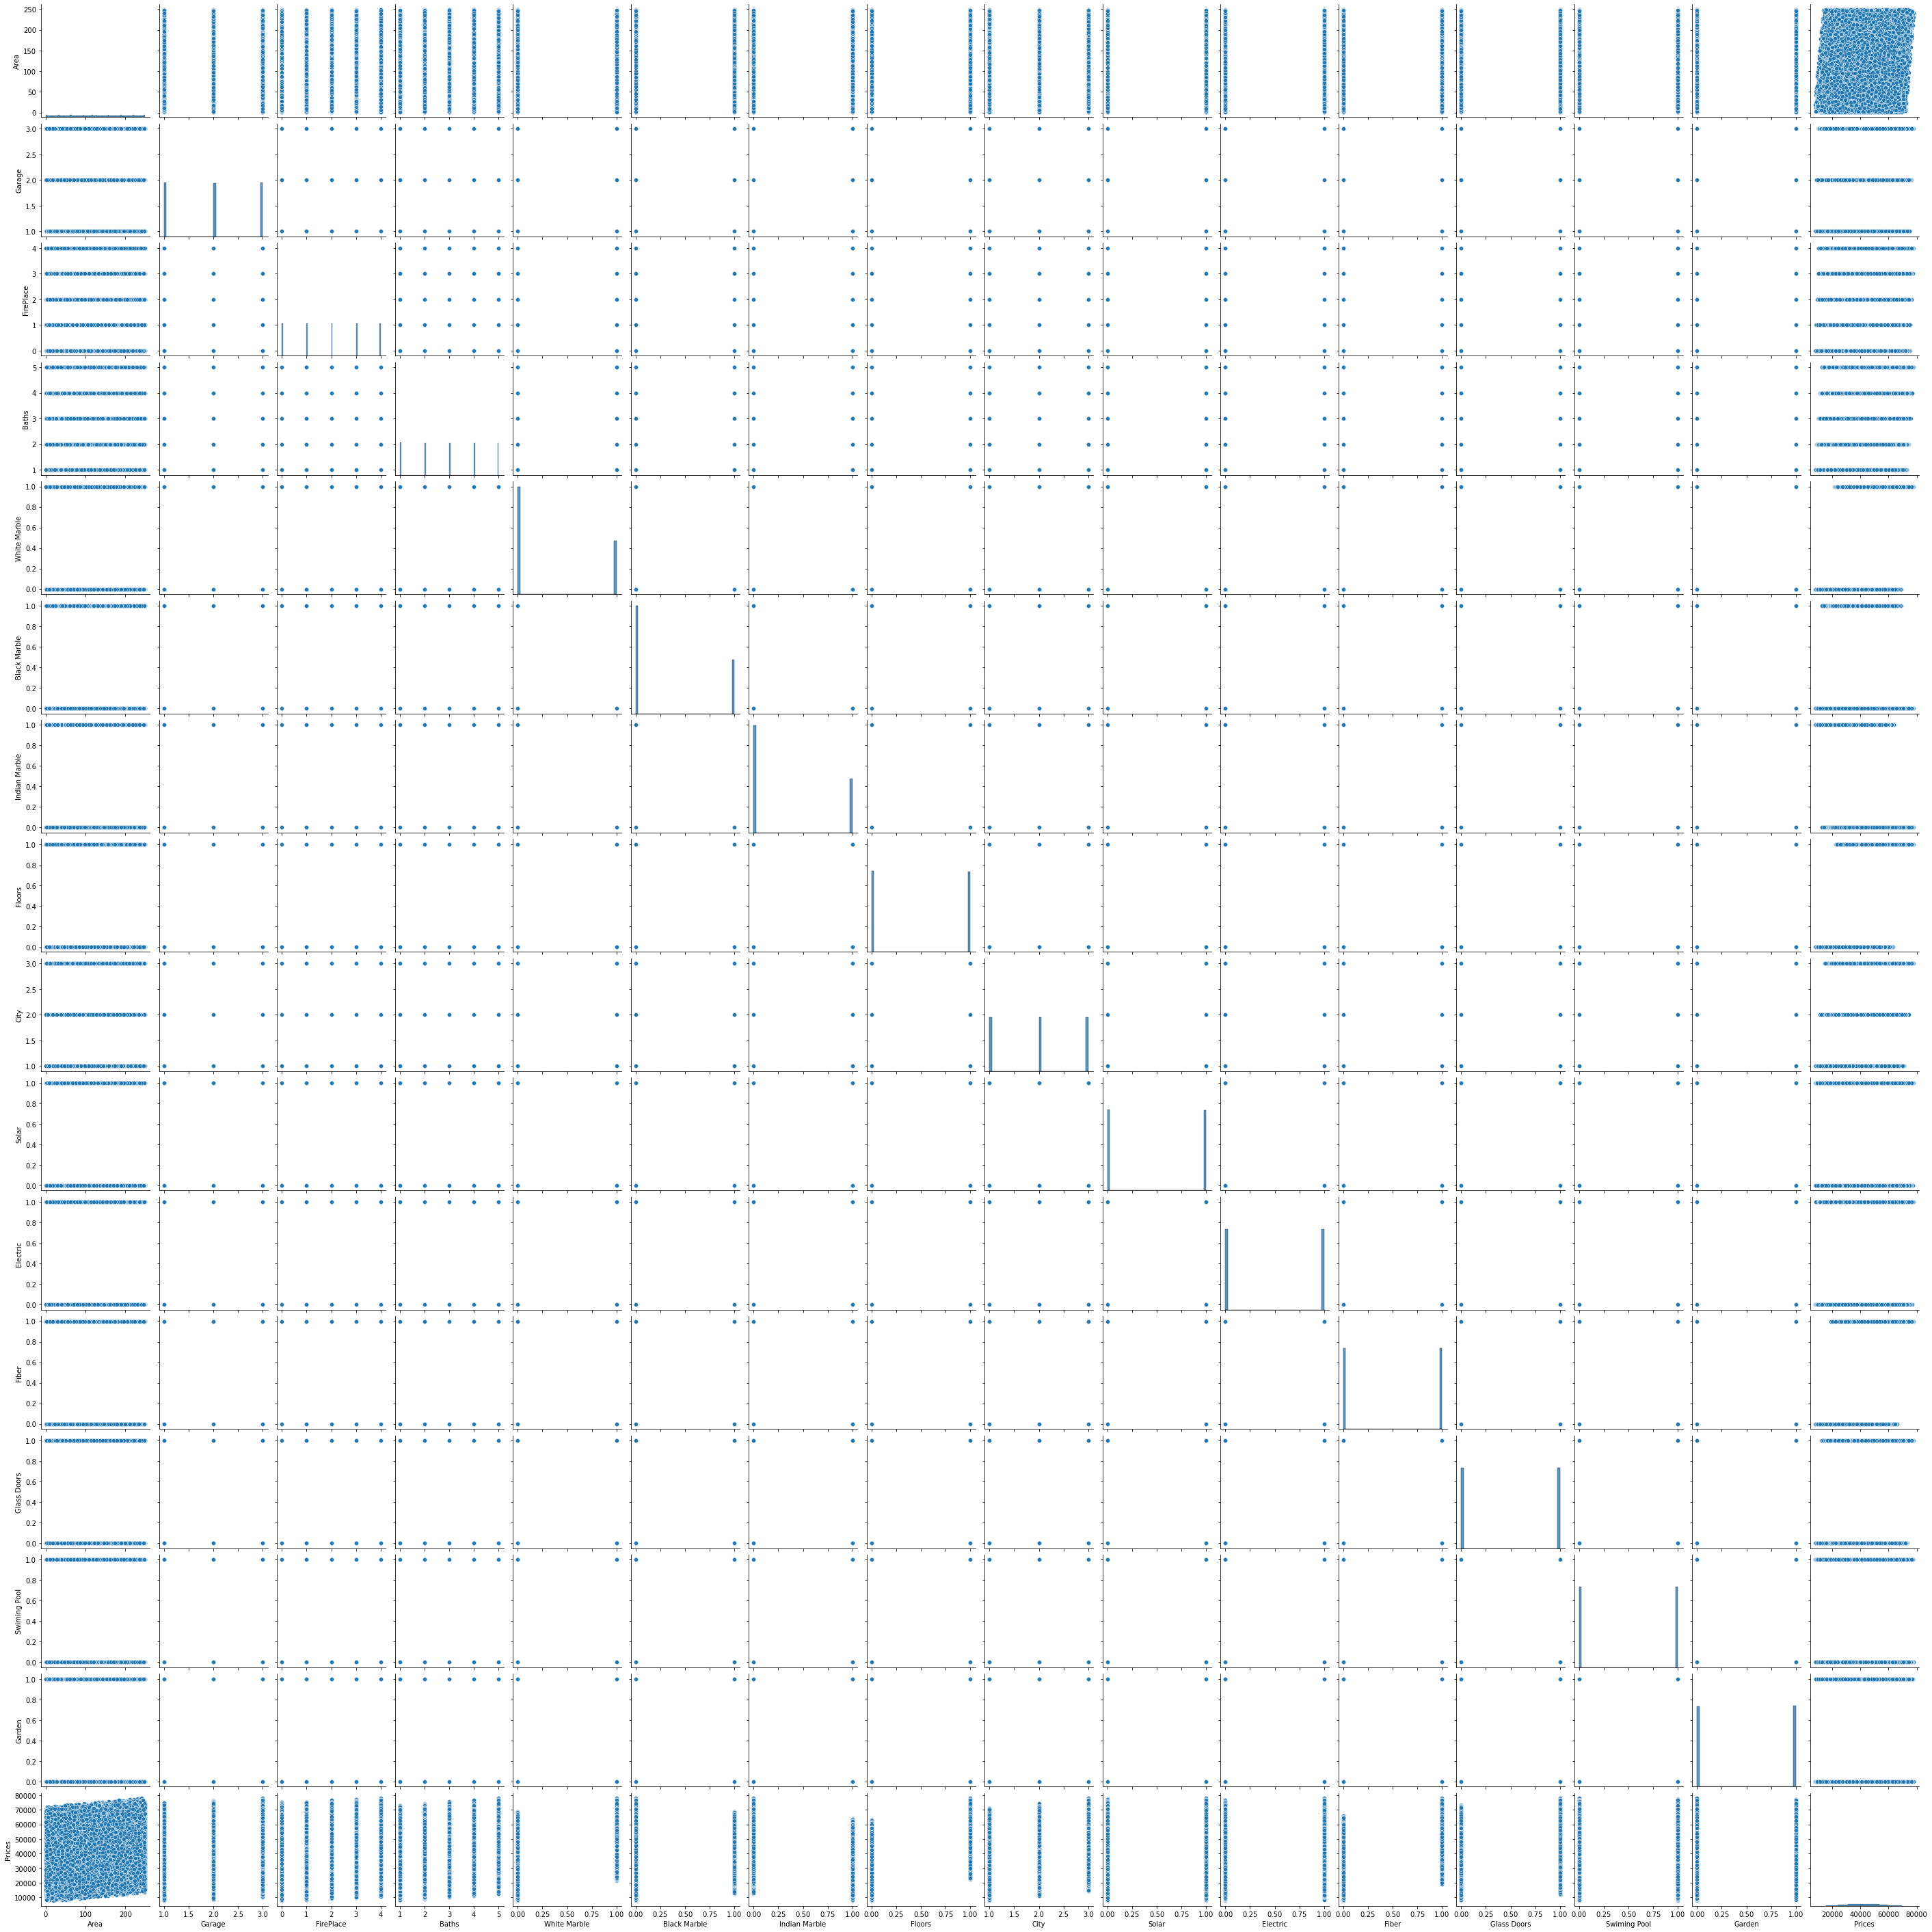

In [15]:
sns.pairplot(file)

#### Focusing on specific Scatter plots

In [16]:
def draw_scatter_plot(X, Y):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='c')
    plt.title("Feature vs Price",  fontsize = 18, fontweight='bold')
    plt.ylabel("Count", fontsize = 15)
    plt.xlabel("Price", fontsize = 15)
    plt.show();

#### Feature = Area

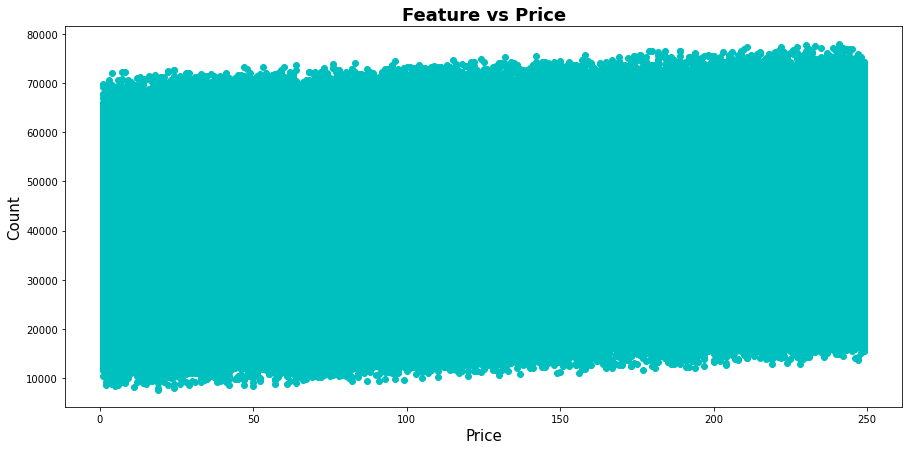

In [17]:
draw_scatter_plot(file['Area'], file['Prices'])

#### Feature = White Marble

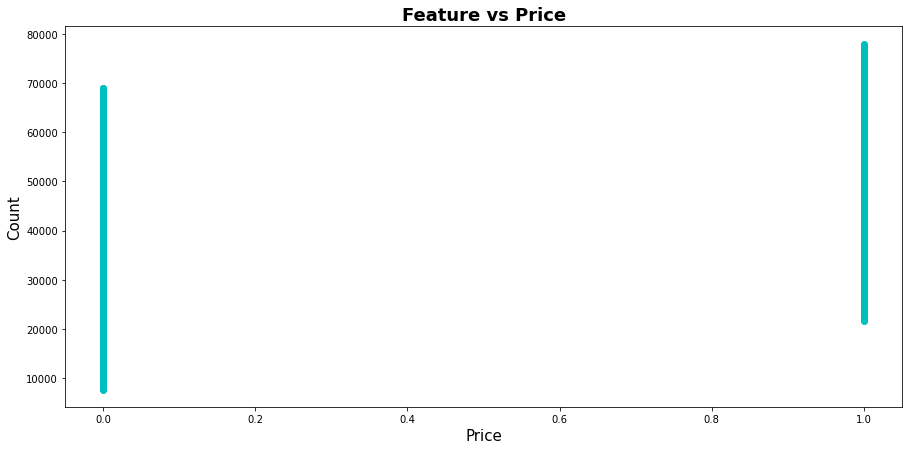

In [18]:
draw_scatter_plot(file['White Marble'], file['Prices'])

In [19]:
# Correlation = 0.44: White Marble in the house does impact house price. 

#### Feature = Garden

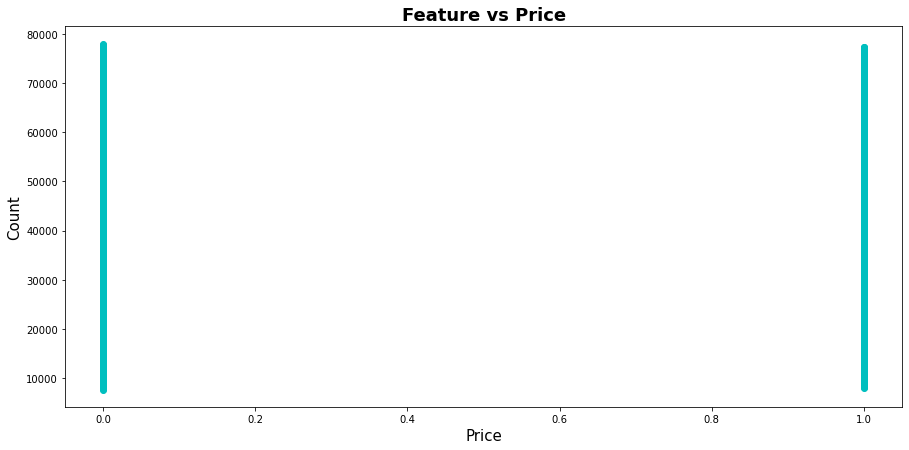

In [20]:
draw_scatter_plot(file['Garden'], file['Prices'])

In [21]:
# Correlation = 0.001: The number of gardens do not impact the price. 

#### Price vs Number of Floors ( Corr=  0.619451)

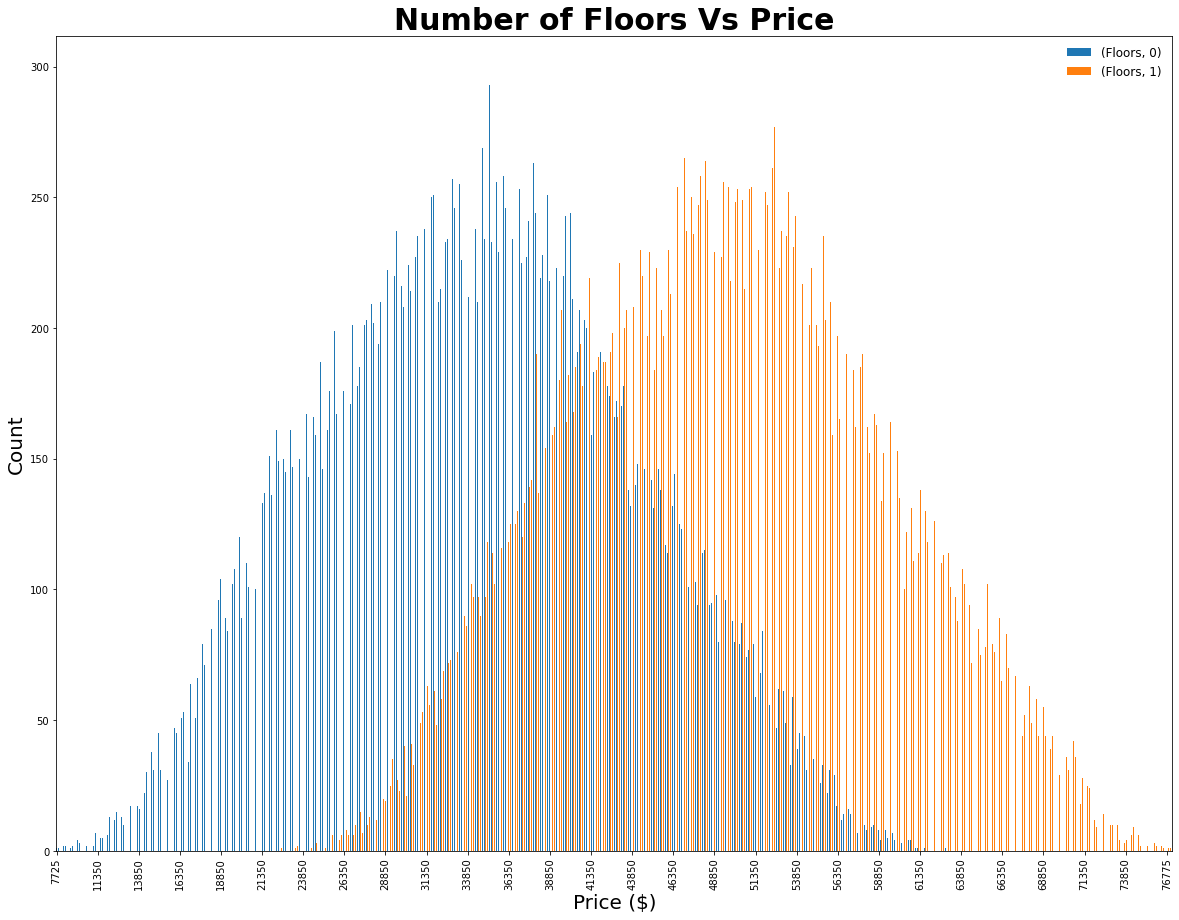

In [22]:
import matplotlib.ticker as ticker
tick_spacing = 100

ax = file.groupby(by=['Prices', 'Floors']).agg({'Floors': 'count'}).unstack().plot(kind='bar',figsize=(20,15))

ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title("Number of Floors Vs Price",  fontsize = 30, fontweight='bold')
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Price ($)", fontsize = 20)
plt.legend(loc='upper right', frameon=False, fontsize='large')

In [23]:
# Houses with multiple "Floors" are more skewed towards the expensive price range as oppose to floors with a single "Floor"

#### Price vs Number of Glass Doors ( Corr= 0.181973)

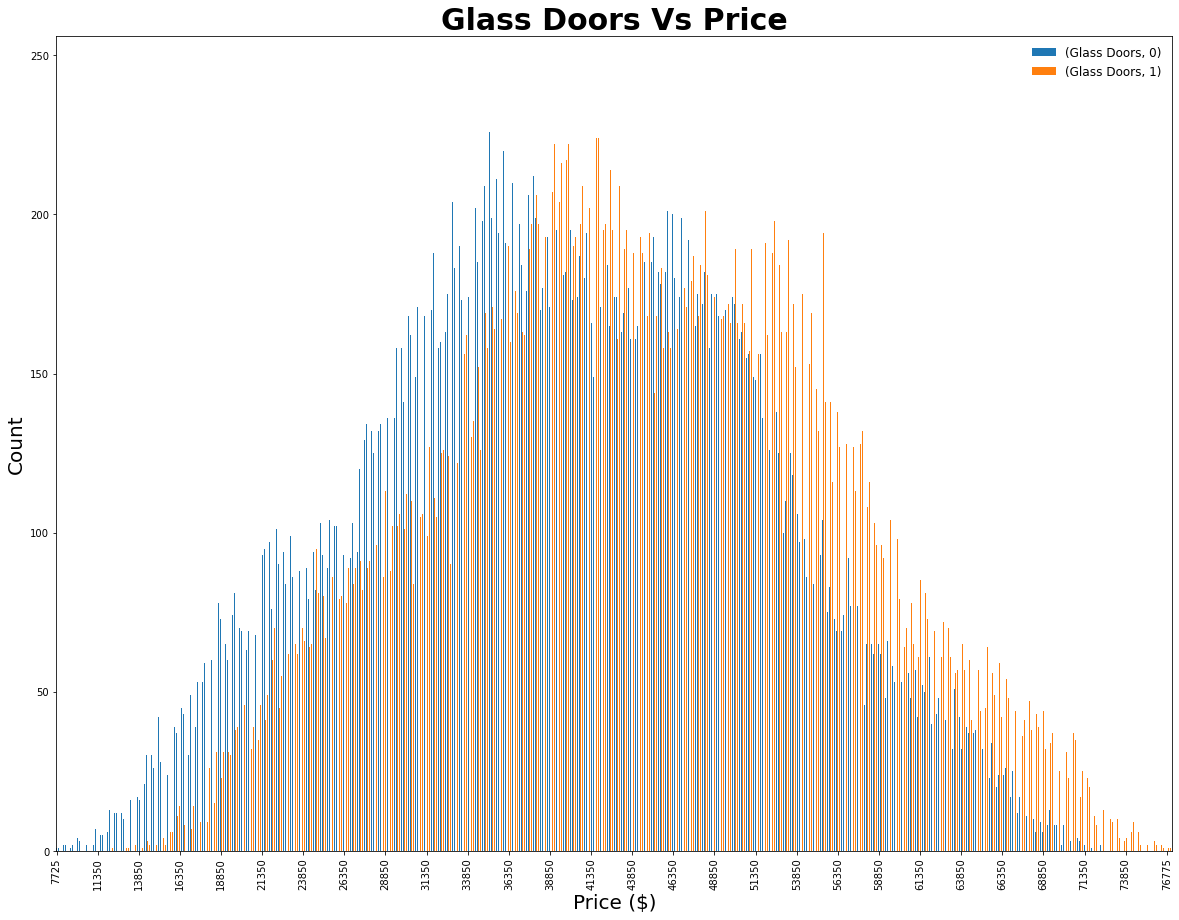

In [24]:
import matplotlib.ticker as ticker
tick_spacing = 100

ax = file.groupby(by=['Prices', 'Glass Doors']).agg({'Glass Doors': 'count'}).unstack().plot(kind='bar',figsize=(20,15))

ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title("Glass Doors Vs Price",  fontsize = 30, fontweight='bold')
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Price ($)", fontsize = 20)
plt.legend(loc='upper right', frameon=False, fontsize='large')

In [25]:
# Houses with "Gardens" are more skewed towards the expensive price range as oppose to floors with no "Gardens". This trend is less defined then "Floors"

#### Price vs Number of Gardens ( Corr= 0.001540)

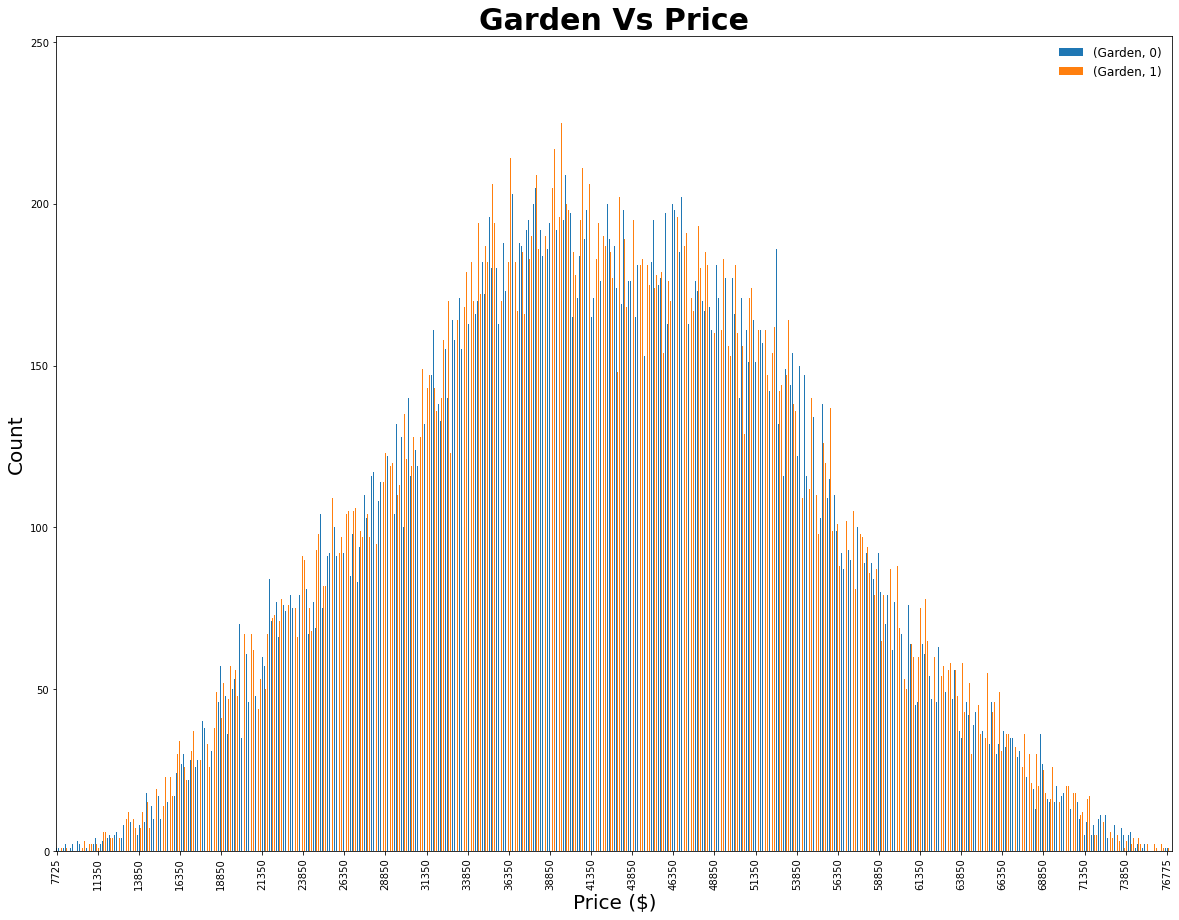

In [26]:
import matplotlib.ticker as ticker
tick_spacing = 100

ax = file.groupby(by=['Prices', 'Garden']).agg({'Garden': 'count'}).unstack().plot(kind='bar',figsize=(20,15))

ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title("Garden Vs Price",  fontsize = 30, fontweight='bold')
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Price ($)", fontsize = 20)
plt.legend(loc='upper right', frameon=False, fontsize='large')

In [27]:
# The price is not impacted by the garden as the price is the same regardless. 

# <u> 1.1 Linear Regression: 14 Features <u>

In [28]:
print(file.columns)

Index(['Area', 'Garage', 'FirePlace', 'Baths', 'White Marble', 'Black Marble',
       'Indian Marble', 'Floors', 'City', 'Solar', 'Electric', 'Fiber',
       'Glass Doors', 'Swiming Pool', 'Garden', 'Prices'],
      dtype='object')


In [29]:
y= file["Prices"]
X= file[['Area', 'Garage', 'FirePlace', 'Baths', 'White Marble', 'Black Marble',
       'Indian Marble', 'Floors', 'City', 'Electric', 'Fiber',
       'Glass Doors', 'Swiming Pool', 'Garden']]

In [30]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

# Model
Lreg = LinearRegression()

# fit the model with taining data
Lreg.fit(X_train, y_train)

# Predictions
y_train_pred3= Lreg.predict(X_train)
y_preds= Lreg.predict(X_test)

# Calculate the score (R^2 for Regression) for Testing Data
R2_Test_LR1= Lreg.score(X_test, y_test)

# Metrics
MAE_LR1= metrics.mean_absolute_error(y_test, y_preds)
MSE_LR1= metrics.mean_squared_error(y_test, y_preds)
TRRMSE_LR1= np.sqrt(metrics.mean_squared_error(y_train, y_train_pred3))
RMSE_LR1= np.sqrt(metrics.mean_squared_error(y_test, y_preds))
R2_LR1= metrics.r2_score(y_test, y_preds)
MAPE_LR1=  mean_absolute_percentage_error(y_test, y_preds)

# DataFrame
Linear_Regression1_metrics_Test = pd.DataFrame({ 'R2': R2_LR1, 'Training RMSE': TRRMSE_LR1,'R2 Test': R2_Test_LR1,  'Test RMSE': RMSE_LR1, 'MSE': MSE_LR1, 'MAPE': MAPE_LR1, 'MAE': MAE_LR1},index=['Linear Regression1 Metrics'])
Linear_Regression1_metrics_Test

,R2,Training RMSE,R2 Test,Test RMSE,MSE,MAPE,MAE
Linear Regression1 Metrics,0.999893,124.997122,0.999893,125.000059,15625.014717,0.003287,124.997178


### 1.1a Cross Validation: 14 Feature Linear Regression

In [31]:
# Cross Validation 
Lreg= LinearRegression()
cv_scores = cross_val_score(Lreg, X_train, y_train, cv=4)
print("Cross Validation Scores are:",cv_scores)
meanCV= np.mean(cv_scores)
print("Average 4-Fold CV Score", meanCV)

Cross Validation Scores are: [0.99989384 0.99989434 0.99989278 0.99989318]
Average 4-Fold CV Score 0.9998935349408052


In [32]:
# K-Fold Cross Validation
kf=KFold(n_splits=4)
score=cross_val_score(Lreg,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.99989317 0.99989298 0.99989395 0.99989374]
Average Cross Validation score :0.9998934575034587


# <u> 1.2 Linear Regression: All Features <u>

In [33]:
X= file.drop('Prices', axis=1).values
y= file['Prices'].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
reg= LinearRegression()

# Fit the model with the Training data
reg.fit(X_train, y_train)

#predicting:
y_train_pred= reg.predict(X_train)
y_preds= reg.predict(X_test)

# Metrics 
MAE_AF= metrics.mean_absolute_error(y_test, y_preds)
MSE_AF= metrics.mean_squared_error(y_test, y_preds)
TRRMSE_AF= np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
RMSE_AF= np.sqrt(metrics.mean_squared_error(y_test, y_preds))
R2_AF= metrics.r2_score(y_test, y_preds)
MAPE_AF=  mean_absolute_percentage_error(y_test, y_preds)

# Create a metrics_df dataframe to display r2 and rmse scores
Regression_metrics_Test = pd.DataFrame({ 'R2': R2_AF, 'Training RMSE': TRRMSE_AF, 'Test RMSE': RMSE_AF, 'MSE': MSE_AF, 'MAPE': MAPE_AF, 'MAE': MAE_AF},index=['Linear Regression (All Features) Metrics'])
Regression_metrics_Test

,R2,Training RMSE,Test RMSE,MSE,MAPE,MAE
Linear Regression (All Features) Metrics,1.0,1.503139e-10,1.505306e-10,2.265945e-20,3.425198e-15,1.294387e-10


### 1.2a Cross Validation: All Feature Linear Regression

In [35]:
# Cross Validation 
LregAF= LinearRegression()
cv_scoresLRAF = cross_val_score(LregAF, X_train, y_train, cv=4)
print("Cross Validation Scores are:",cv_scoresLRAF)
meanCVLRAF= np.mean(cv_scoresLRAF)
print("Average 4-Fold CV Score", meanCVLRAF)

Cross Validation Scores are: [1. 1. 1. 1.]
Average 4-Fold CV Score 1.0


In [36]:
# K-Fold Cross Validation
kfLRAF=KFold(n_splits=4)
score=cross_val_score(LregAF,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1. 1. 1. 1.]
Average Cross Validation score :1.0


# <u>2.1 Ridge Regression: 14 Features <u>

In [37]:
y= file["Prices"]
X= file[['Area', 'Garage', 'FirePlace', 'Baths', 'White Marble', 'Black Marble',
       'Indian Marble', 'Floors', 'City', 'Electric', 'Fiber',
       'Glass Doors', 'Swiming Pool', 'Garden']]

## 2.2 Finding the Optimal Alpha 

In [38]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#### 2.2a GridSearch

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
params = {'alpha': (np.logspace(-8, 8, 200))}
ridgee = Ridge(normalize=True)
ridgee_model = GridSearchCV(ridgee, params, cv = 4)
ridgee_model.fit(X_train, y_train)
print('Optimal Alpha:', ridgee_model.best_params_)
print('Score:', ridgee_model.best_score_)

Optimal Alpha: {'alpha': 1e-08}
Score: 0.9998935349407998


#### 2.2b RidgeCV

In [40]:
optimal_ridge = RidgeCV(alphas=np.logspace(-8, 8, 200)) 
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))
                         
              

Alpha: 0.0003180625692794119
Score: 0.9998926734422658


## 2.3 Fitting the Model 1 (ridge1):

In [41]:
# Applying Gridsearch optimal Alpha 1e-08
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
ridge1= Ridge(alpha=1e-08, normalize = True)
ridge1.fit(X_train, y_train)

# Predictions:
pred_train1= ridge1.predict(X_train)
ridge_pred1 = ridge1.predict(X_test)

# Metrics
MAE_RR1= metrics.mean_absolute_error(y_test, ridge_pred1)
MSE_RR1=mean_squared_error(y_test,ridge_pred1)
TRRMSE_RR1= np.sqrt(mean_squared_error(y_train, pred_train1))
RMSE_RR1= np.sqrt(mean_squared_error(y_test,ridge_pred1))
R2_RR1= metrics.r2_score(y_test, ridge_pred1)
MAPE_RR1=  mean_absolute_percentage_error(y_test, ridge_pred1)

# Dataframe of results
Ridge1_Regression_metrics_Test = pd.DataFrame({ 'R2': R2_RR1, 'Training RMSE': TRRMSE_RR1, ' Test RMSE': RMSE_RR1, 'MSE': MSE_RR1, 'MAPE': MAPE_RR1, 'MAE': MAE_RR1},index=['Ridge1 Regression Metrics'])
Ridge1_Regression_metrics_Test

,R2,Training RMSE,Test RMSE,MSE,MAPE,MAE
Ridge1 Regression Metrics,0.999893,124.997122,125.000058,15625.014598,0.003287,124.997178


#### 2.3a Cross Validation: Ridge1

In [42]:
cv_scoresRR1 = cross_val_score(ridge1, X_train, y_train, cv=4)
print("Cross Validation Scores are:",cv_scoresRR1)
meanCVRR= np.mean(cv_scoresRR1)
print("Average 4-Fold CV Score", meanCVRR)

Cross Validation Scores are: [0.99989384 0.99989434 0.99989278 0.99989318]
Average 4-Fold CV Score 0.9998935349407998


## 2.4 Fitting the Model 2 (ridge2):

In [43]:
# Applying RidgeCV optimal Alpha 0.0003180625692794119
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
ridge2= Ridge(alpha=0.0003180625692794119, normalize = True)
ridge2.fit(X_train, y_train)

# Predictions:
pred_train2= ridge2.predict(X_train)
ridge_pred2 = ridge2.predict(X_test)

# Metrics
MAE_RR2= metrics.mean_absolute_error(y_test, ridge_pred2)
MSE_RR2=mean_squared_error(y_test,ridge_pred2)
TRRMSE_RR2= np.sqrt(mean_squared_error(y_train, pred_train2))
RMSE_RR2= np.sqrt(mean_squared_error(y_test,ridge_pred2))
R2_RR2= metrics.r2_score(y_test, ridge_pred2)
MAPE_RR2=  mean_absolute_percentage_error(y_test, ridge_pred2)

# Dataframe of results
Ridge2_Regression_metrics_Test = pd.DataFrame({ 'R2': R2_RR2, 'Training RMSE': TRRMSE_RR2, ' Test RMSE': RMSE_RR2, 'MSE': MSE_RR2, 'MAPE': MAPE_RR2, 'MAE': MAE_RR2},index=['Ridge2 Regression Metrics'])
Ridge2_Regression_metrics_Test

,R2,Training RMSE,Test RMSE,MSE,MAPE,MAE
Ridge2 Regression Metrics,0.999893,125.048969,125.036712,15634.17927,0.003286,124.980121


#### 2.4a Cross Validation: Ridge2

In [44]:
cv_scoresRR2 = cross_val_score(ridge2, X_train, y_train, cv=4)
print("Cross Validation Scores are:", cv_scoresRR2)
meanCVRR2= np.mean(cv_scoresRR2)
print("Average 4-Fold CV Score", meanCVRR2)

Cross Validation Scores are: [0.99989382 0.99989427 0.99989263 0.99989307]
Average 4-Fold CV Score 0.9998934464378088


# <u> 2.5 Ridge Regression: ALL Features <u>

In [45]:
X= file.drop('Prices', axis=1).values
y= file['Prices'].values

## 2.6 Finding the Optimal Alpha 

#### 2.6a GridSearch

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
params = {'alpha': (np.logspace(-8, 8, 200))}
ridgeAF = Ridge(normalize=True)
ridgeAF_model = GridSearchCV(ridgeAF, params, cv = 4)
ridgeAF_model.fit(X_train, y_train)
print('Optimal Alpha:', ridgeAF_model.best_params_)
print('Score:', ridgeAF_model.best_score_)

Optimal Alpha: {'alpha': 1e-08}
Score: 0.9999999999999999


#### 2.6b RidgeCV

In [47]:
optimal_ridgeAF = RidgeCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1,2])
optimal_ridgeAF.fit(X, y)
print('Alpha:', optimal_ridgeAF.alpha_)
print('Score:', optimal_ridgeAF.score(X, y))

Alpha: 0.0001
Score: 0.9999920269477351


## 2.7 Fitting the Model 3 (ridge3):

In [48]:
#Applying Gridsearch optimal Alpha 1e-08
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

ridge3= Ridge(alpha=1e-08, normalize = True)
ridge3.fit(X_train, y_train)
# Predict
pred_train3= ridge3.predict(X_train)
ridge_pred3 = ridge3.predict(X_test)

# Metrics
MAE_RRAF1= metrics.mean_absolute_error(y_test, ridge_pred3)
MSE_RRAF1=mean_squared_error(y_test,ridge_pred3)

RMSE_RRAF1= np.sqrt(mean_squared_error(y_test,ridge_pred3))
TRRMSE_RRAF1= np.sqrt(mean_squared_error(y_train, pred_train3))
R2_RRAF1= metrics.r2_score(y_test, ridge_pred3)
MAPE_RRAF1=  mean_absolute_percentage_error(y_test, ridge_pred3)

# Dataframe of results
Ridge_Regression_metrics_Test = pd.DataFrame({'Alpha': 1e-08, 'R2': R2_RRAF1, 'Training RMSE': TRRMSE_RRAF1, ' Test RMSE': RMSE_RRAF1, 'MSE': MSE_RRAF1, 'MAPE': MAPE_RRAF1, 'MAE': MAE_RRAF1},index=['Ridge Regression1 (All Features) Metrics'])
Ridge_Regression_metrics_Test

,Alpha,R2,Training RMSE,Test RMSE,MSE,MAPE,MAE
Ridge Regression1 (All Features) Metrics,1.000000e-08,1.0,0.000113,0.000113,1.279064e-08,2.637927e-09,0.000093


### 2.7a Cross Validation: ridge3

In [49]:
cv_scoresRRAF1 = cross_val_score(ridge3, X_train, y_train, cv=4)
print("Cross Validation Scores are:", cv_scoresRRAF1)
meanCVRRAF1= np.mean(cv_scoresRRAF1)
print("Average 4-Fold CV Score", meanCVRRAF1)

Cross Validation Scores are: [1. 1. 1. 1.]
Average 4-Fold CV Score 0.9999999999999999


## 2.8 Fitting the Model 4 (ridge4):

In [50]:
#Applying Gridsearch optimal Alpha 0.0001
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

ridge4= Ridge(alpha=0.0001, normalize = True)
ridge4.fit(X_train, y_train)
# Predict
pred_train4= ridge4.predict(X_train)
ridge_pred4 = ridge4.predict(X_test)

# Metrics
MAE_RRAF2= metrics.mean_absolute_error(y_test, ridge_pred4)
MSE_RRAF2=mean_squared_error(y_test,ridge_pred4)

RMSE_RRAF2= np.sqrt(mean_squared_error(y_test,ridge_pred4))
TRRMSE_RRAF2= np.sqrt(mean_squared_error(y_train, pred_train4))
R2_RRAF2= metrics.r2_score(y_test, ridge_pred4)
MAPE_RRAF2=  mean_absolute_percentage_error(y_test, ridge_pred4)

# Dataframe of results
Ridge_Regression_metrics_Test = pd.DataFrame({ 'R2': R2_RRAF2, 'Training RMSE': TRRMSE_RRAF2, ' Test RMSE': RMSE_RRAF2, 'MSE': MSE_RRAF2, 'MAPE': MAPE_RRAF2, 'MAE': MAE_RRAF2},index=['Ridge Regression2 (All Features) Metrics'])
Ridge_Regression_metrics_Test

,R2,Training RMSE,Test RMSE,MSE,MAPE,MAE
Ridge Regression2 (All Features) Metrics,1.0,1.132347,1.130848,1.278817,0.000026,0.925364


## 2.8a Cross Validation: ridge3

In [51]:
cv_scoresRRAF2 = cross_val_score(ridge4, X_train, y_train, cv=4)
print("Cross Validation Scores are:", cv_scoresRRAF2)
meanCVRRAF2= np.mean(cv_scoresRRAF2)
print("Average 4-Fold CV Score", meanCVRRAF2)

Cross Validation Scores are: [0.99999999 0.99999999 0.99999999 0.99999999]
Average 4-Fold CV Score 0.999999991263061


# <u> 3.1 Lasso Regression: 14 Features <u>

In [52]:
y= file["Prices"]
X= file[['Area', 'Garage', 'FirePlace', 'Baths', 'White Marble', 'Black Marble',
       'Indian Marble', 'Floors', 'City', 'Electric', 'Fiber',
       'Glass Doors', 'Swiming Pool', 'Garden']]

## 3.2 Finding the Optimal Alpha 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 3.2a  GridSearch

In [54]:
params = {'alpha': (np.logspace(-8, 8, 200))} # It will check from 1e-08 to 1e+08
lasso = Lasso(normalize=True)
lasso_model = GridSearchCV(lasso, params, cv = 4)
lasso_model.fit(X_train, y_train)
print("'Optimal Alpha:", lasso_model.best_params_)
print("Score:", lasso_model.best_score_)

'Optimal Alpha: {'alpha': 0.00010473708979594486}
Score: 0.9998935351559765


#### 3.2b LassoCV

In [55]:
lasso_alphas = np.logspace(-8, 8, 200)
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=4)
optimal_lasso.fit(X, y)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X, y))

Alpha: 0.00890735463861044
Score: 0.9998934639158861


## 3.3 Fitting the Model 1: Lasso1

In [56]:
# Applying Gridsearch optimal Alpha 0.00010473708979594486
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lasso1= Lasso(alpha= 0.00010473708979594486, normalize = True)
lasso1.fit(X_train, y_train)

# Predictions:
lasso_train1 = lasso1.predict(X_train)
lasso_pred1= lasso1.predict(X_test)


# Metrics
MAE_LL1= metrics.mean_absolute_error(y_test, lasso_pred1)
MSE_LL1=mean_squared_error(y_test,lasso_pred1)
TRRMSE_LL1= np.sqrt(mean_squared_error(y_train, lasso_train1))
RMSE_LL1= np.sqrt(mean_squared_error(y_test,lasso_pred1))
R2_LL1= metrics.r2_score(y_test, lasso_pred1)
MAPE_LL1=  mean_absolute_percentage_error(y_test, lasso_pred1)

# Dataframe of results
Lasso1_Regression_metrics_Test = pd.DataFrame({ 'R2': R2_LL1, 'Training RMSE': TRRMSE_LL1, ' Test RMSE': RMSE_LL1, 'MSE': MSE_LL1, 'MAPE': MAPE_LL1, 'MAE': MAE_LL1},index=['Lasso1 Regression Metrics'])
Lasso1_Regression_metrics_Test

,R2,Training RMSE,Test RMSE,MSE,MAPE,MAE
Lasso1 Regression Metrics,0.999893,124.99731,124.998948,15624.737097,0.003287,124.996639


#### 3.3a Cross Validation: Lasso1

In [57]:
cv_scoresLR1 = cross_val_score(lasso1, X_train, y_train, cv=4)
print("Cross Validation Scores are:", cv_scoresLR1)
meanCVLR1= np.mean(cv_scoresLR1)
print("Average 4-Fold CV Score", meanCVLR1)

Cross Validation Scores are: [0.99989384 0.99989434 0.99989278 0.99989318]
Average 4-Fold CV Score 0.9998935351559765


## 3.4 Fitting the Model 2: Lasso2

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lasso2= Lasso(alpha=0.00890735463861044, normalize = True)
lasso2.fit(X_train, y_train)

# Predictions:
lasso_train2 = lasso2.predict(X_train)
lasso_pred2= lasso2.predict(X_test)


# Metrics
MAE_LL2= metrics.mean_absolute_error(y_test, lasso_pred2)
MSE_LL2=mean_squared_error(y_test,lasso_pred2)
TRRMSE_LL2= np.sqrt(mean_squared_error(y_train, lasso_train2))
RMSE_LL2= np.sqrt(mean_squared_error(y_test,lasso_pred2))
R2_LL2= metrics.r2_score(y_test, lasso_pred2)
MAPE_LL2=  mean_absolute_percentage_error(y_test, lasso_pred2)

# Dataframe of results
Lasso2_Regression_metrics_Test = pd.DataFrame({ 'R2': R2_LL2, 'Training RMSE': TRRMSE_LL2, ' Test RMSE': RMSE_LL2, 'MSE': MSE_LL2, 'MAPE': MAPE_LL2, 'MAE': MAE_LL2},index=['Lasso2 Regression Metrics'])
Lasso2_Regression_metrics_Test

,R2,Training RMSE,Test RMSE,MSE,MAPE,MAE
Lasso2 Regression Metrics,0.999891,126.138614,126.055839,15890.074523,0.003286,124.936847


#### 3.4a Cross Validation: Lasso2

In [59]:
cv_scoresLR2 = cross_val_score(lasso2, X_train, y_train, cv=4)
print("Cross Validation Scores are:",cv_scoresLR2)
meanCVLR2= np.mean(cv_scoresLR2)
print("Average 4-Fold CV Score", meanCVLR2)

Cross Validation Scores are: [0.99989256 0.99989296 0.99989113 0.99989163]
Average 4-Fold CV Score 0.9998920726342825


# <u> 3.5  Lasso Regression: ALL Features <u>

In [3]:
X = file.drop('Prices', axis=1).values
y = file['Prices'].values

## 3.6 Finding the Optimal Alpha 

#### 3.6a GridSearch

In [62]:
params = {'alpha': (np.logspace(-8, 8, 200))} 
lassoAF1 = Lasso(normalize=True)
lassoAF1_model = GridSearchCV(lassoAF1, params, cv = 4)
lassoAF1_model.fit(X_train, y_train)
print('Optimal Alpha:', lassoAF1_model.best_params_)
print("Score:", lassoAF1_model.best_score_)

Optimal Alpha: {'alpha': 0.00010473708979594486}
Score: 0.9998935351559765


#### 3.6b LassoCV

In [63]:
optimal_lassoAF1 = LassoCV(alphas=np.logspace(-8, 8, 200))
optimal_lassoAF1.fit(X, y)
print('Alpha:', optimal_lassoAF1.alpha_)
print('Score:', optimal_lassoAF1.score(X, y))

Alpha: 1e-08
Score: 0.9999999999984516


## 3.7 Fitting the Model 3: LassoAF1

In [4]:
# Applying Gridsearch optimal Alpha 0.00010473708979594486
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lassoAF1= Lasso(alpha= 0.00010473708979594486, normalize = True)
lassoAF1.fit(X_train, y_train)

# Predictions:
lasso_trainAF1 = lassoAF1.predict(X_train)
lasso_predAF1= lassoAF1.predict(X_test)


# Metrics
MAE_LAF1= metrics.mean_absolute_error(y_test, lasso_predAF1)
MSE_LAF1=mean_squared_error(y_test,lasso_predAF1)
TRRMSE_LAF1= np.sqrt(mean_squared_error(y_train, lasso_trainAF1))
RMSE_LAF1= np.sqrt(mean_squared_error(y_test,lasso_predAF1))
R2_LAF1= metrics.r2_score(y_test, lasso_predAF1)
MAPE_LAF1=  mean_absolute_percentage_error(y_test, lasso_predAF1)

# Dataframe of results
Lasso1AF_Regression_metrics_Test = pd.DataFrame({ 'R2': R2_LAF1, 'Training RMSE': TRRMSE_LAF1, ' Test RMSE': RMSE_LAF1, 'MSE': MSE_LAF1, 'MAPE': MAPE_LAF1, 'MAE': MAE_LAF1},index=['Lasso1 Regression (All Features) Metrics'])
Lasso1AF_Regression_metrics_Test

,R2,Training RMSE,Test RMSE,MSE,MAPE,MAE
Lasso1 Regression (All Features) Metrics,1.0,0.207213,0.206524,0.042652,0.000005,0.165794


#### 3.7a Cross Validation: LassoAF1

In [5]:
cv_scoresAF1 = cross_val_score(lassoAF1, X_train, y_train, cv=4)
print("Cross Validation Scores are:",cv_scoresAF1)
meanCVAF1= np.mean(cv_scoresAF1)
print("Average 4-Fold CV Score", meanCVAF1)

Cross Validation Scores are: [1. 1. 1. 1.]
Average 4-Fold CV Score 0.9999999997799041


## 3.8 Fitting the Model 4: Lasso2AF

In [6]:
# Applying Gridsearch optimal Alpha 1e-08
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lasso2AF= Lasso(alpha= 1e-08, normalize = True)
lasso2AF.fit(X_train, y_train)

# Predictions:
lasso_train2AF = lasso2AF.predict(X_train)
lasso_pred2AF= lasso2AF.predict(X_test)


# Metrics
MAE_LAF2= metrics.mean_absolute_error(y_test, lasso_pred2AF)
MSE_LAF2=mean_squared_error(y_test,lasso_pred2AF)
TRRMSE_LAF2= np.sqrt(mean_squared_error(y_train, lasso_train2AF))
RMSE_LAF2= np.sqrt(mean_squared_error(y_test,lasso_pred2AF))
R2_LAF2= metrics.r2_score(y_test, lasso_pred2AF)
MAPE_LAF2=  mean_absolute_percentage_error(y_test, lasso_pred2AF)

# Dataframe of results
Lasso1_Regression_metrics_Test = pd.DataFrame({ 'R2': R2_LAF2, 'Training RMSE': TRRMSE_LAF2, ' Test RMSE': RMSE_LAF2, 'MSE': MSE_LAF2, 'MAPE': MAPE_LAF2, 'MAE': MAE_LAF2},index=['Lasso2 Regression2 (All Features) Metrics'])
Lasso1_Regression_metrics_Test

,R2,Training RMSE,Test RMSE,MSE,MAPE,MAE
Lasso2 Regression2 (All Features) Metrics,1.0,0.016102,0.0161,0.000259,3.184891e-07,0.013289


#### 3.8a Cross Validation: Lasso2AF

In [7]:
cv_scoresAF2 = cross_val_score(lasso2AF, X_train, y_train, cv=4)
print("Cross Validation Scores are:",cv_scoresAF2)
meanCVAF2= np.mean(cv_scoresAF2)
print("Average 4-Fold CV Score", meanCVAF2)

Cross Validation Scores are: [1. 1. 1. 1.]
Average 4-Fold CV Score 0.9999999999982264


In [8]:
optimal_lassoAF1 = LassoCV(alphas=np.logspace(-8, 8, 200))
optimal_lassoAF1.fit(X, y)
print('Alpha:', optimal_lassoAF1.alpha_)
print('Score:', optimal_lassoAF1.score(X, y))

Alpha: 1e-08
Score: 0.9999999999984516


[   24.01160926  1413.28284401   700.26467045  1199.71158016
  8900.91544344     0.         -4899.841258   14857.95610906
  3412.80993039   108.45578042  1109.56285894 11608.04750305
  4307.56413736     0.             0.        ]


C:\Users\61425\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


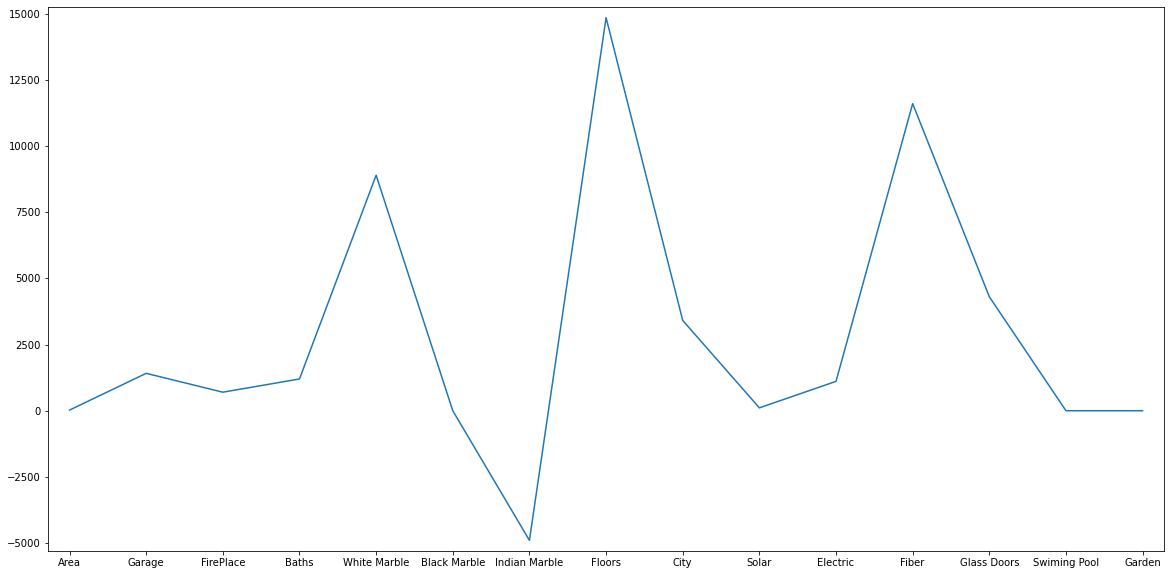

In [69]:
from sklearn.linear_model import Lasso
X = file.drop('Prices', axis=1).values
y = file['Prices'].values
lasso= Lasso(alpha=0.1, normalize = True)
lasso.fit(X, y)
lasso_coef= lasso.coef_
print(lasso_coef)

columns = file.drop('Prices', axis=1).columns
fig, axes = plt.subplots(figsize = (20,10))
sns.lineplot(range(len(columns)), lasso_coef)
plt.xticks(range(len(columns)), columns.values)
plt.margins(0.02)
plt.show()

# 4.1 Tabulation of overall Results: 

In [70]:
data= [{'Alpha': "NaN", 'Training RMSE': TRRMSE_LR1, 'R2': R2_LR1, "Average 4-Fold CV Score": meanCV, 'Test RMSE': RMSE_LR1, 'MSE': MSE_LR1, 'MAPE': MAPE_LR1, 'MAE': MAE_LR1}, 
       {'Alpha': 1e-08,'Training RMSE': TRRMSE_RR1, 'R2': R2_RR1, "Average 4-Fold CV Score": meanCVRR, 'Test RMSE': RMSE_RR1, 'MSE': MSE_RR1, 'MAPE': MAPE_RR1, 'MAE': MAE_RR1},
       {'Alpha': 0.0003180625692794119,'Training RMSE': TRRMSE_RR2, 'R2': R2_RR2, "Average 4-Fold CV Score": meanCVRR2, 'Test RMSE': RMSE_RR2, 'MSE': MSE_RR2, 'MAPE': MAPE_RR2, 'MAE': MAE_RR2},
       {'Alpha': 0.00010473708979594486,'Training RMSE': TRRMSE_LL1, 'R2': R2_LL1, "Average 4-Fold CV Score": meanCVLR1, 'Test RMSE': RMSE_LL1, 'MSE': MSE_LL1, 'MAPE': MAPE_LL1, 'MAE': MAE_LL1},
       {'Alpha': 0.00890735463861044,'Training RMSE': TRRMSE_LL2, 'R2': R2_LL2, "Average 4-Fold CV Score": meanCVLR2, 'Test RMSE': RMSE_LL2, 'MSE': MSE_LL2, 'MAPE': MAPE_LL2, 'MAE': MAE_LL2},
      {'Alpha': "NaN",'Training RMSE': TRRMSE_AF, 'R2': R2_AF, "Average 4-Fold CV Score": meanCVLRAF, 'Test RMSE': RMSE_AF, 'MSE': MSE_AF, 'MAPE': MAPE_AF, 'MAE': MAE_AF},
      {'Alpha': 1e-08,'Training RMSE': TRRMSE_RRAF1, 'R2': R2_RRAF1, "Average 4-Fold CV Score": meanCVRRAF1, 'Test RMSE': RMSE_RRAF1, 'MSE': MSE_RRAF1, 'MAPE': MAPE_RRAF1, 'MAE': MAE_RRAF1},
{'Alpha': 0.0001,'Training RMSE': TRRMSE_RRAF2, 'R2': R2_RRAF2, "Average 4-Fold CV Score": meanCVRRAF2, 'Test RMSE': RMSE_RRAF2, 'MSE': MSE_RRAF2, 'MAPE': MAPE_RRAF2, 'MAE': MAE_RRAF2},
      {'Alpha': 0.00010473708979594486,'Training RMSE': TRRMSE_LAF1, 'R2': R2_LAF1, "Average 4-Fold CV Score": meanCVAF1, 'Test RMSE': RMSE_LAF1, 'MSE': MSE_LAF1, 'MAPE': MAPE_LAF1, 'MAE': MAE_LAF1},
      {'Alpha': 1e-08,'Training RMSE': TRRMSE_LAF2, 'R2': R2_LAF2, "Average 4-Fold CV Score": meanCVAF2, 'Test RMSE': RMSE_LAF2, 'MSE': MSE_LAF2, 'MAPE': MAPE_LAF2, 'MAE': MAE_LAF2}]
 
 


Assignment_Results= pd.DataFrame(data, index=['Linear_Regression (14 Features)', 'Ridge1_Regression(14 Features)', 'Ridge2_Regression(14 Features)', 'Lasso1_Regression(14 Features)', 'Lasso2_Regression(14 Features)', 'Linear_Regression(All Features)', "Ridge3_Regression(All Features)","Ridge4_Regression(All Features)", "Lasso3_Regression(All Features)","Lasso4_Regression(All Features)"])


In [71]:
Assignment_Results

,Alpha,Training RMSE,R2,Average 4-Fold CV Score,Test RMSE,MSE,MAPE,MAE
Linear_Regression (14 Features),NaN,1.249971e+02,0.999893,0.999894,1.250001e+02,1.562501e+04,3.286572e-03,1.249972e+02
Ridge1_Regression(14 Features),0.0,1.249971e+02,0.999893,0.999894,1.250001e+02,1.562501e+04,3.286572e-03,1.249972e+02
Ridge2_Regression(14 Features),0.000318,1.250490e+02,0.999893,0.999893,1.250367e+02,1.563418e+04,3.286382e-03,1.249801e+02
Lasso1_Regression(14 Features),0.000105,1.249973e+02,0.999893,0.999894,1.249989e+02,1.562474e+04,3.286568e-03,1.249966e+02
Lasso2_Regression(14 Features),0.008907,1.261386e+02,0.999891,0.999892,1.260558e+02,1.589007e+04,3.285989e-03,1.249368e+02
Linear_Regression(All Features),NaN,1.503139e-10,1.000000,1.000000,1.505306e-10,2.265945e-20,3.425198e-15,1.294387e-10
Ridge3_Regression(All Features),0.0,1.132457e-04,1.000000,1.000000,1.130957e-04,1.279064e-08,2.637927e-09,9.254530e-05
Ridge4_Regression(All Features),0.0001,1.132347e+00,1.000000,1.000000,1.130848e+00,1.278817e+00,2.637673e-05,9.253637e-01
Lasso3_Regression(All Features),0.000105,2.072135e-01,1.000000,1.000000,2.065240e-01,4.265214e-02,4.611658e-06,1.657935e-01
Lasso4_Regression(All Features),0.0,1.610165e-02,1.000000,1.000000,1.609957e-02,2.591961e-04,3.184891e-07,1.328947e-02


In [73]:
# We can see here the "All features" out preformed the "14 feature" in all models. 
# Out of the 14 feature model,The "Linear_Regression" and the "Ridge1_regression (14 features) has identical scores.  The Lasso Regression 1 model preformed the best as it has the best R2 score and MSE. However, it did have a lower TRMSE Score which could over decreased the overall MSE in training. 
# Out of the "All Feature" parameters, the "Linear_Regression(All Features) preformed the best. 